___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [866]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [867]:
#pip install yellowbrick

In [868]:
df=pd.read_pickle("golden_data_dummy.pkl")

In [869]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [871]:
df.isnull().sum()

displacement                  0
hp                            0
km                            0
ss_abs                        0
ss_adaptive_cruise_control    0
                             ..
type_Demonstration            0
type_Employee's car           0
type_New                      0
type_Pre-registered           0
type_Used                     0
Length: 136, dtype: int64

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [872]:
X=df.drop('price',axis=1)
y=df.price

In [873]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [874]:
lm=LinearRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)

In [875]:
lm.coef_

array([-8.68526287e-01,  9.75678426e+01, -3.70107222e-02, -1.86000681e+01,
       -6.00439105e+01,  3.26215689e+02,  1.07197494e+02, -3.56622796e+02,
       -3.15778439e+02, -3.91356900e+01, -2.08281540e+02,  6.87878661e+01,
       -1.68466629e+02, -2.84450646e+02,  1.00905444e-01, -7.60306808e+02,
       -1.13633722e+02, -1.11474828e+02, -2.11629325e+02, -3.58753328e+02,
       -2.25035805e+02,  6.73205218e+02,  7.95615469e+02,  6.47169238e+02,
        5.14002132e+02, -4.11969172e+02, -5.16345688e+02,  1.01128720e+02,
        1.32369735e+02,  2.31203336e+02, -1.41288201e+01, -3.92099486e+02,
        1.00972895e+02, -1.11558691e+02, -1.59715155e+03, -5.48243043e+02,
        1.48882326e+02,  9.48213697e+02, -7.76767827e+01, -7.26565204e+01,
       -1.22572685e+01,  3.37642724e+02, -2.03537914e+02, -1.49582244e+03,
       -2.05210928e+02,  3.01040942e+02,  4.40656120e+01, -9.73750803e+01,
        2.65686900e+02,  2.91635908e+02, -2.47884699e+01,  3.25423696e+02,
       -2.31103877e+02,  

In [876]:
print(dir(lm))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_decision_function', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_preprocess_data', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_residues', '_set_intercept', '_validate_data', 'coef_', 'copy_X', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'n_features_in_', 'n_jobs', 'normalize', 'positive', 'predict', 'rank_', 'score', 'set_params', 'singular_']


In [877]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [878]:
eval_metrics(y_test,y_pred)

r2_score: 0.8918333328983831 
 mae: 1672.930597789271 
 mse: 5482500.359230778 
 rmse: 2341.4739715040137


In [879]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [880]:
compare.sample(10)

,Actual,Pred
10282,10689,11228.466171
9722,9900,11542.138157
4757,21500,21444.490460
8624,7600,5862.568668
13875,8800,5600.538486
13921,9389,7578.451315
10708,15980,15958.340167
8187,18070,17491.781091
9033,7800,9009.698118
10033,15850,15686.920757


In [881]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train)
cv_scores.mean()

0.8863107422744019

In [882]:
cv_scores

array([0.88505619, 0.88684462, 0.88293418, 0.88412374, 0.89259498])

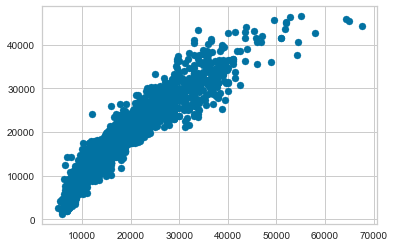

In [883]:
plt.scatter(y_test,y_pred)

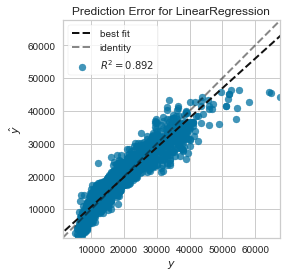

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [884]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

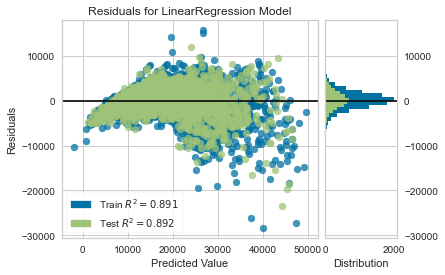

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [885]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [886]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [887]:
ridge_model=Ridge(normalize=True)

In [888]:
ridge_model.fit(X_train,y_train)

Ridge(normalize=True)

In [889]:
y_pred=ridge_model.predict(X_test)

In [890]:
eval_metrics(y_test,y_pred)

r2_score: 0.8351296199768291 
 mae: 1962.1666036215022 
 mse: 8356566.231761401 
 rmse: 2890.772601184915


In [891]:
alpha_space = np.linspace(0.1, 20, 50)

In [892]:
ridge_model=Ridge(0.1,normalize=True).fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.889344300131111 
 mae: 1668.8376112575909 
 mse: 5608658.661102889 
 rmse: 2368.260682674711


In [893]:
ridge_model=Ridge(0.01,normalize=True).fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.8918467672048289 
 mae: 1670.7134687078694 
 mse: 5481819.432362186 
 rmse: 2341.3285613860744


In [894]:
ridge_model=Ridge(17,normalize=True).fit(X_train,y_train)
y_pred=ridge_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.3713825592869363 
 mae: 4253.975022610859 
 mse: 31861898.280460045 
 rmse: 5644.634468276936


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [895]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [896]:
lasso_model=Lasso(normalize=True).fit(X_train,y_train)
y_pred=lasso_model.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.88490072870881 
 mae: 1693.6190339179122 
 mse: 5833884.070850852 
 rmse: 2415.3434685052252


In [897]:
alpha_space = np.linspace(0.1, 20, 50)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [898]:
lasso_cv_model.alpha_

0.1

In [899]:
#pip install -U scikit-learn scipy matplotlib

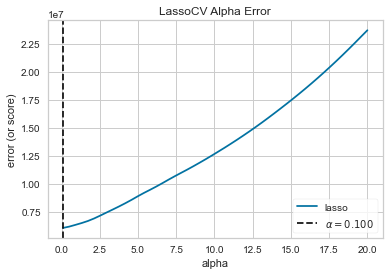

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [900]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [901]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8916259747942515 
 mae: 1670.8574274896425 
 mse: 5493010.444369319 
 rmse: 2343.717227902999


In [902]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [903]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

110

In [904]:
lasso_model = Lasso(10, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7467337735895012 
 mae: 2586.6556732835734 
 mse: 12836969.229828712 
 rmse: 3582.871645737356


In [905]:
# Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

9

In [906]:
significant_features.sort_values(by="coef", ascending=False)

,features,coef
99,model_Espace,3522.502386
90,make_Audi,2299.011463
21,ss_led_headlights,289.906313
51,cc_automatic_climate_control,218.798315
1,hp,130.097645
59,cc_heads_up_display,62.544262
2,km,-0.014847
124,gearing_type_Manual,-725.430610
34,age,-1468.239575


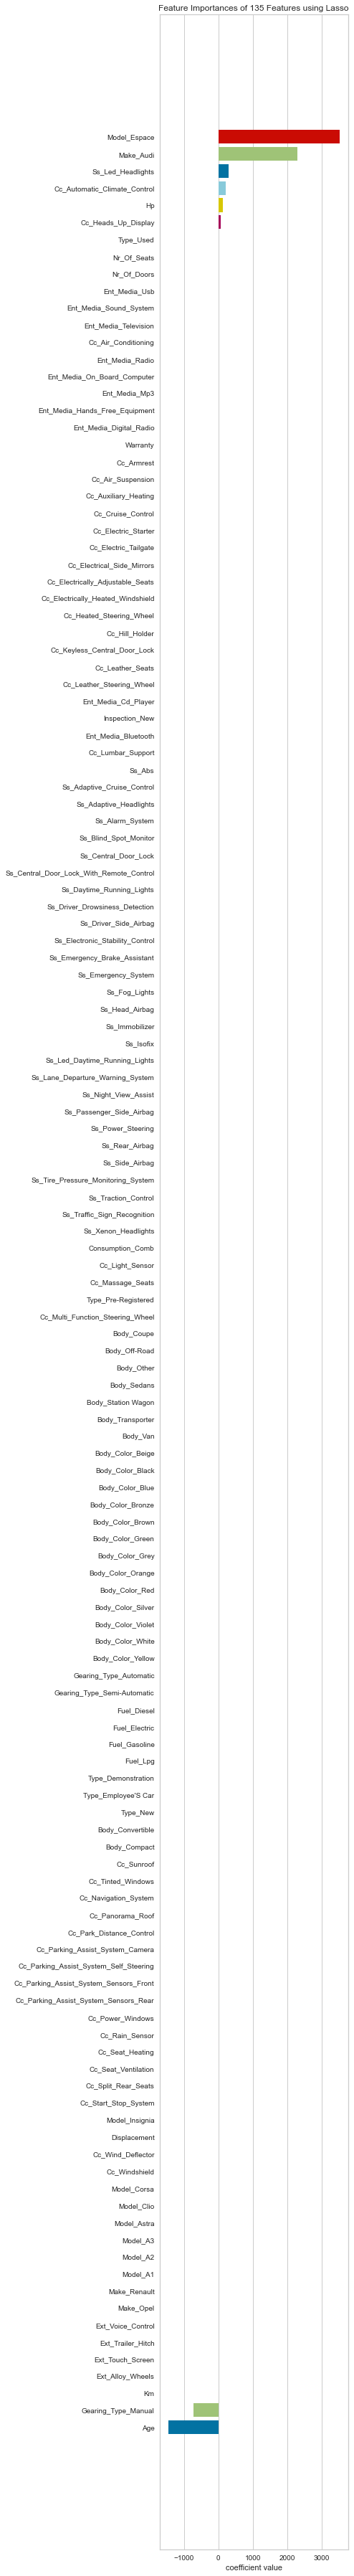

<AxesSubplot:title={'center':'Feature Importances of 135 Features using Lasso'}, xlabel='coefficient value'>

In [907]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

saving sci-kit learn model

In [908]:
df2=pd.read_pickle("golden_data_not_dummy.pkl")

In [909]:
df2.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [910]:
df2[:5]['price']

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [911]:
df2.gearing_type.value_counts()

Manual            7637
Automatic         6896
Semi-automatic     461
Name: gearing_type, dtype: int64

In [912]:
df2[:5][['hp',"age",'km','model','gearing_type']]

,hp,age,km,model,gearing_type
0,66.0,3,56013,A1,Automatic
1,141.0,2,80000,A1,Automatic
2,85.0,3,83450,A1,Automatic
3,66.0,3,73000,A1,Automatic
4,66.0,3,16200,A1,Automatic


In [913]:
df2.shape

(14994, 98)

In [914]:
y=df2["price"][:14990]

In [915]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [916]:
X=df2[['hp',"age",'km','model','gearing_type']][:14990]

In [917]:
X=pd.get_dummies(X)

In [918]:
X.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,66.0,3,56013,1,0,0,0,0,0,0,0,1,0,0
1,141.0,2,80000,1,0,0,0,0,0,0,0,1,0,0
2,85.0,3,83450,1,0,0,0,0,0,0,0,1,0,0
3,66.0,3,73000,1,0,0,0,0,0,0,0,1,0,0
4,66.0,3,16200,1,0,0,0,0,0,0,0,1,0,0


In [919]:
X.shape

(14990, 14)

In [920]:
y.shape

(14990,)

In [921]:
import pickle
columns=X.columns
pickle.dump(columns, open("my_columns", 'wb'))

In [922]:
columns=pickle.load(open('my_columns','rb'))

In [923]:
columns

Index(['hp', 'age', 'km', 'model_A1', 'model_A2', 'model_A3', 'model_Astra',
       'model_Clio', 'model_Corsa', 'model_Espace', 'model_Insignia',
       'gearing_type_Automatic', 'gearing_type_Manual',
       'gearing_type_Semi-automatic'],
      dtype='object')

In [924]:
y.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [925]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8550267302893201 
 mae: 1882.780321821478 
 mse: 7287365.248764298 
 rmse: 2699.5120390108095


In [926]:
import pickle
pickle.dump(lm, open("saved_model", 'wb'))

In [927]:
my_model=pickle.load(open("saved_model", "rb"))

In [928]:
scaler=StandardScaler()
my_scaler=scaler.fit(X_train)
pickle.dump(my_scaler, open("my_scaler", 'wb'))

<IPython.core.display.Javascript object>

In [929]:
scaler=pickle.load(open("my_scaler", "rb"))

In [930]:
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

In [931]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_sc,y_train)

RandomForestRegressor()

In [932]:
y_pred = rf.predict(X_test_sc)
eval_metrics(y_test, y_pred)

r2_score: 0.9244958478474333 
 mae: 1111.2748861846378 
 mse: 3795364.0393991377 
 rmse: 1948.1694072639416


In [933]:
pickle.dump(rf, open("rf_model", 'wb'))
rf_model=pickle.load(open("rf_model", "rb"))

In [934]:
from xgboost import XGBRFRegressor
xgb=XGBRFRegressor()
xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [935]:
y_pred = xgb.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8918790063943383 
 mae: 1597.0472393379441 
 mse: 5434913.436361031 
 rmse: 2331.2900798401365


In [936]:
pickle.dump(xgb, open("xgb_model", 'wb'))
xgb_model=pickle.load(open("xgb_model", "rb"))

In [937]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3',
    'gearing_type':'Automatic'
}

In [938]:
df = pd.DataFrame.from_dict([my_dict])

In [939]:
df.head()

,hp,age,km,model,gearing_type
0,200,1,100000,A3,Automatic


In [940]:
df = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

In [941]:
df.head()

,hp,age,km,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic
0,200,1,100000,0,0,1,0,0,0,0,0,1,0,0


In [942]:
lm_pred=list(my_model.predict(df))

In [943]:
xgb_pred=list(xgb_model.predict(df))

In [944]:
print('lm_pred   :',lm_pred,'\n\n','rf_model :',rf_pred,'\n\n','xgb_model:', xgb_pred)

lm_pred   : [32906.681337883696] 

 rf_model : [21876.89] 

 xgb_model: [20123.525]


In [945]:
rf_pred=list(rf_model.predict(df))

In [946]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___